In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import tqdm
import multiprocessing as mp
from config import *

path = result_parent_directory + os.sep + 'step4_btms_sizing_sensitivity'

result_directory = path + os.sep + 'analysis'
os.makedirs(result_directory, exist_ok=True)
figure_directory = path + os.sep + 'figures'
os.makedirs(figure_directory, exist_ok=True)

sizing_results_path = os.path.join(path, 'sizing_results')

load results 

In [23]:
# load all results from path to list and add taz name as df name
sizing_results = []
sizing_results_params = []
for folder in os.listdir(sizing_results_path):
    sizing_results_one_param_combination = []
    for file in os.listdir(sizing_results_path + os.sep + folder):
        if file.startswith('btms_sizing'):
            if file.endswith(".csv"):
                df0 = pd.read_csv(os.path.join(sizing_results_path, folder, file), index_col=0)
                name = file.split('.')[0]
                #remove btms_sizing from name
                df0.name = name.split('_')[2]
                sizing_results_one_param_combination.append(df0)
    sizing_results.append(sizing_results_one_param_combination)

In [24]:
len(sizing_results)

21

In [25]:
saved_sizing_results = sizing_results.copy()

In [34]:
sizing_results = saved_sizing_results.copy()

In [45]:
for combination in sizing_results:
    print(combination[0].columns[-1])
#recognize parameters for each result in sizing_results
sizing_results_params = []
for x in sizing_results:
    df0 = x[0]
    a = df0['param: btms size, a,b_sys,b_cap,c'][1]
    b_sys = df0['param: btms size, a,b_sys,b_cap,c'][2]
    b_cap = df0['param: btms size, a,b_sys,b_cap,c'][3]
    c = df0['param: btms size, a,b_sys,b_cap,c'][4]
    param_dict= {'a': [a], 'b_sys': [b_sys], 'b_cap': [b_cap], 'c': [c]}
    sizing_results_params.append(pd.DataFrame(param_dict))

param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c
param: btms size, a,b_sys,b_cap,c


In [46]:
print(sizing_results_params)

[          a     b_sys     b_cap     c
0  0.263014  0.033973  0.023148  0.12,           a     b_sys     b_cap     c
0  0.591781  0.033973  0.023148  0.12,           a     b_sys     b_cap     c
0  0.657534  0.033973  0.023148  0.12,           a     b_sys     b_cap     c
0  0.032877  0.033973  0.023148  0.12,           a     b_sys     b_cap     c
0  0.065753  0.033973  0.023148  0.12,           a     b_sys     b_cap     c
0  0.624658  0.033973  0.023148  0.12,           a     b_sys     b_cap     c
0  0.526027  0.033973  0.023148  0.12,          a     b_sys     b_cap     c
0  0.19726  0.033973  0.023148  0.12,          a     b_sys     b_cap     c
0  0.09863  0.033973  0.023148  0.12,           a     b_sys     b_cap     c
0  0.493151  0.033973  0.023148  0.12,           a     b_sys     b_cap     c
0  0.558904  0.033973  0.023148  0.12,          a     b_sys     b_cap     c
0  0.29589  0.033973  0.023148  0.12,           a     b_sys     b_cap     c
0  0.361644  0.033973  0.023148  0.12,     

In [48]:
sizing_results_old = sizing_results
# create a list of all a values
a_values = []
for x in sizing_results_params:
    a_values.append(x['a'].values[0])
# create an idx list for sorting
a_values_idx = np.argsort(a_values)
# sort sizing_results and sizing_results_params
sizing_results = [sizing_results[i] for i in a_values_idx]
sizing_results_params = [sizing_results_params[i] for i in a_values_idx]

In [49]:
# show all a values multiplied by 365/12
a_values = [x['a'].values[0] for x in sizing_results_params]
a_values = [x*365/12 for x in a_values]
# round to 2 decimal places
a_values = [round(x, 2) for x in a_values]
print(a_values)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]


In [50]:
from functions.stats_sizing_function import stats_sizing_function
# create df with stats for each parameter combination and each taz
stats_per_param_combination_list = []
for sizing_results_one_param_combination in sizing_results:
    stats = pd.DataFrame()
    for df0 in sizing_results_one_param_combination:
        stats = stats.append(pd.DataFrame(stats_sizing_function(df0, timestep), index=[df0.name]))
    stats_per_param_combination_list.append(stats)

In [51]:
stats_per_param_combination = pd.concat(stats_per_param_combination_list, keys=a_values)

In [52]:
# show stats for a = 1
stats_per_param_combination.loc[10].describe()

,btms_size,cost_a,cost_b_sys,cost_b_cap,cost_b,cost_c,cost_total,share_cost_a,share_cost_b_sys,share_cost_b_cap,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor,btms_peak_to_grid_ratio
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,292.515204,10.931405,15.665221,15.358245,31.023466,12.003676,53.958547,0.188112,0.319191,0.276602,0.595792,0.216095,683.684094,1.847066,1.935810,0.873146,0.996185,19.226978
std,140.300310,7.568638,6.111086,7.675512,11.976594,6.012629,24.566950,0.043684,0.116642,0.044504,0.074113,0.034744,441.610667,0.908960,0.491902,0.078760,0.031315,15.066928
min,43.676603,0.708816,4.863030,1.189450,8.517625,0.924916,12.941719,0.054770,0.103655,0.091908,0.428294,0.071468,44.000000,0.439286,1.000000,0.468542,0.647754,3.732398
25%,192.048791,6.099095,9.702001,9.569152,21.377329,7.482236,37.372720,0.164327,0.238835,0.253957,0.544769,0.198904,382.416667,1.239132,1.556678,0.834402,1.000000,10.604280
50%,275.864053,10.354985,16.339473,15.538454,30.558158,12.082702,52.259527,0.188101,0.305011,0.282597,0.589194,0.221463,651.916667,1.689741,1.908911,0.878005,1.000000,15.799863
75%,390.621968,13.810651,19.308471,19.968217,38.487746,15.616686,67.320565,0.214845,0.385145,0.307336,0.632907,0.239445,878.083333,2.249890,2.234753,0.929905,1.000000,22.227509
max,882.241182,49.315071,40.767123,43.726172,84.493295,34.701471,168.509838,0.398945,0.781854,0.353054,0.873762,0.278537,2957.166667,6.819304,3.678372,0.992650,1.000000,138.147715


In [53]:
stats_per_param_combination.loc[1].describe()

,btms_size,cost_a,cost_b_sys,cost_b_cap,cost_b,cost_c,cost_total,share_cost_a,share_cost_b_sys,share_cost_b_cap,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor,btms_peak_to_grid_ratio
count,1.570000e+02,157.000000,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,157.000000,157.000000,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,157.000000,157.000000,157.000000,1.570000e+02,157.000000,1.570000e+02
mean,3.964876e+01,9.398528,7.082988e+00,1.376113e+00,8.459101e+00,1.070066e+00,18.927695,0.581454,3.092799e-01,6.146837e-02,3.707482e-01,4.779781e-02,683.684094,6.849003,2.947453,1.282054e-01,0.144911,3.749222e+00
std,3.608660e+01,3.176735,5.712516e+00,1.321003e+00,6.774702e+00,1.027212e+00,8.021944,0.299872,2.166028e-01,5.887604e-02,2.615620e-01,4.578201e-02,441.610667,10.611892,4.983353,2.278506e-01,0.204970,1.453425e+01
min,2.069976e-08,0.070882,4.890487e-10,5.155864e-09,6.887654e-09,4.119889e-09,4.931507,0.005761,4.958411e-11,5.227473e-10,6.983316e-10,4.177110e-10,44.000000,0.308981,1.000000,2.613479e-10,0.029293,4.798462e-11
25%,2.915891e-05,9.863014,1.573443e-06,1.129199e-06,2.702642e-06,8.783006e-07,9.863021,0.395020,1.595296e-07,1.144882e-07,2.740178e-07,8.904990e-08,382.416667,2.334675,1.015477,1.695219e-07,0.064246,1.543835e-07
50%,3.628347e+01,9.863014,9.949811e+00,1.176698e+00,1.080680e+01,9.150002e-01,18.174107,0.461973,3.790939e-01,5.713731e-02,5.114939e-01,4.442997e-02,651.916667,4.296713,1.363064,5.950058e-02,0.096207,9.999999e-01
75%,6.678873e+01,9.863014,1.019178e+01,2.264887e+00,1.252475e+01,1.761176e+00,23.762162,1.000000,4.672198e-01,9.418954e-02,5.190909e-01,7.324178e-02,878.083333,6.331377,1.923606,1.180302e-01,0.127800,1.000000e+00
max,1.641869e+02,19.726028,2.547945e+01,5.114152e+00,3.059360e+01,3.976765e+00,54.296397,1.000000,8.223922e-01,2.428511e-01,9.190657e-01,1.888410e-01,2957.166667,60.000000,46.657975,9.926501e-01,1.000000,1.381477e+02


Text(0.5, 1.0, 'btms peak to grid ratio for each a value')

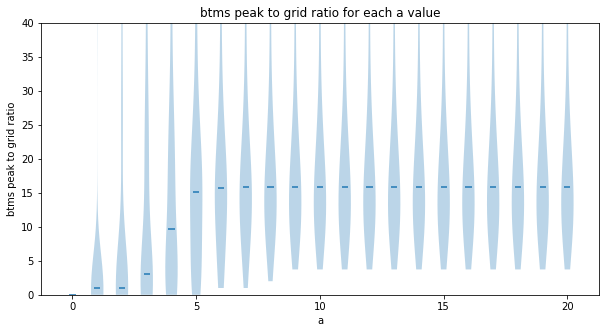

In [54]:
# get btms peak to grid ratio mean and std for each a value
btms_peak_to_grid_ratio_mean = []
btms_peak_to_grid_ratio_std = []
# for a in a_values:
#     btms_peak_to_grid_ratio_mean.append(stats_per_param_combination.loc[a]['btms_peak_to_grid_ratio'].mean())
#     btms_peak_to_grid_ratio_std.append(stats_per_param_combination.loc[a]['btms_peak_to_grid_ratio'].std())

# plot btms peak to grid ratio mean and std for each a value
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.errorbar(a_values, btms_peak_to_grid_ratio_mean, yerr=btms_peak_to_grid_ratio_std, fmt='o')
# ax.set_xlabel('a')
# ax.set_ylabel('btms peak to grid ratio')
# ax.set_title('btms peak to grid ratio mean and std for each a value')

# plot violin plot for btms peak to grid ratio for each a value
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(10, 5))
x = stats_per_param_combination['btms_peak_to_grid_ratio']
dists = [stats_per_param_combination.loc[i]['btms_peak_to_grid_ratio'] for i in a_values]
ax.violinplot(dists, a_values, showmeans=False, showextrema=False, showmedians=True)
ax.set_xlabel('a')
ax.set_ylim(0, 40)
ax.set_ylabel('btms peak to grid ratio')
ax.set_title('btms peak to grid ratio for each a value')


In [ ]:
test = stats_per_param_combination.loc[:, 'c_rate'].unstack()
test

,1008,1013,1033,1034,1035,1039,104,1042,1049,1055,...,918,92,921,928,945,972,978,985,992,999
0.0,11.985785,1.785993,16.846301,7.328761,22.921442,27.182753,6.623302,2.784231,3.102574,6.201148,...,2.197713,6.728206,5.766699,10.041426,2.404100,4.753787,10.660090,10.053147,29.576760,22.499256
1.0,11.214953,2.217147,15.319149,7.045010,6.206896,1.297810,4.485907,2.991043,1.738108,1.750430,...,5.960265,2.691684,4.172882,5.557491,3.116792,3.517091,3.839210,4.332129,21.176471,59.999930
2.0,11.214953,1.588630,4.887441,2.899397,3.236672,1.103520,4.398307,2.991042,1.655126,1.839994,...,2.602434,1.062458,3.955444,5.465293,3.086202,3.453572,3.693618,4.328298,21.176470,1.376612
3.0,3.582329,1.370691,3.295970,2.102080,2.275046,1.085496,4.158262,2.991042,1.286265,1.482195,...,2.385459,1.399848,3.686540,5.362351,2.808852,2.997997,1.846452,1.910772,3.892331,1.234865
4.0,3.111333,1.738995,3.295970,2.102080,2.275046,1.085496,3.651947,2.991042,1.286265,1.482195,...,2.202068,1.247325,1.876646,5.105217,1.686769,1.774794,1.750324,1.910772,3.509501,1.235758
5.0,3.111333,1.700142,3.295970,2.102080,2.275046,1.085496,1.447041,2.991042,1.286265,1.482195,...,1.351099,1.185302,1.437376,2.457551,1.581200,1.735630,1.264639,1.910772,2.232518,1.235758
6.0,3.111333,1.700142,3.295970,2.102080,2.275046,1.085496,1.410106,2.991042,1.286265,1.482195,...,1.351099,1.042967,1.437374,1.917828,1.672018,1.561439,1.264639,1.910772,2.232518,1.235758
7.0,3.111333,1.700142,3.295970,2.102080,2.275046,1.085496,1.046683,2.991042,1.286265,1.482195,...,1.351099,1.042967,1.437374,1.917828,1.319032,1.269526,1.264639,1.910772,2.232518,1.235758
8.0,3.111333,1.700142,3.295970,2.102080,2.275046,1.085496,1.046683,2.991042,1.286265,1.482195,...,1.351099,1.042968,1.437374,1.917828,1.319032,1.269526,1.264639,1.910772,2.232518,1.235758
9.0,3.111333,1.700142,3.295970,2.102080,2.275046,1.085496,1.046683,2.991042,1.286265,1.482195,...,1.351099,1.042968,1.437374,1.917828,1.319032,1.269526,1.264639,1.910772,2.232518,1.235758


In [ ]:
stats_per_param_combination.loc[:, 'btms_ratio'].groupby(level=0).quantile(0.875)

0.0     8.376058e-09
1.0     2.208904e-01
2.0     9.564632e-01
3.0     9.564632e-01
4.0     9.564632e-01
5.0     9.564632e-01
6.0     9.564632e-01
7.0     9.564632e-01
8.0     9.564632e-01
9.0     9.564632e-01
10.0    9.564632e-01
11.0    9.564632e-01
12.0    9.564632e-01
13.0    9.564632e-01
14.0    9.564632e-01
15.0    9.564632e-01
16.0    9.564632e-01
17.0    9.564632e-01
18.0    9.564632e-01
19.0    9.564632e-01
20.0    9.564632e-01
Name: btms_ratio, dtype: float64

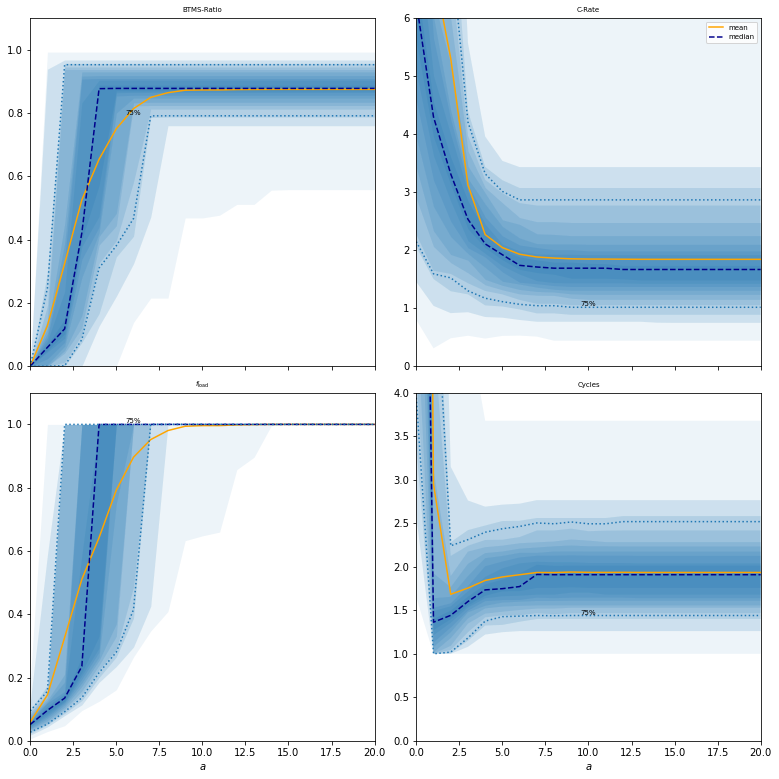

In [55]:
# make a plot of the stats over the a values for mu and sigma of the btms ratio
zoom =3
fig, ax_arr = plt.subplots(2, 2, figsize=(zoom*plotSizeX, zoom*plotSizeX), sharex=True, sharey=False)
ax = ax_arr.flatten()
pltSettings()

def plot_mean_median_color_area(ax, column, alpha):
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).mean(), label='mean', color='orange')
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).median(), label='median', color='darkblue', linestyle='--')
    for i in np.arange(0, 1, 0.05):
        ax.fill_between(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(i), stats_per_param_combination.loc[:, column].groupby(level=0).quantile(1-i), alpha=alpha,  color='C0', linewidth=0, rasterized=True)
    # add lines for 12.5% and 87.5% quantile
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.125), color='C0', linestyle=':')
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.875), color='C0', linestyle=':')
    # add text for 12.5% and 87.5% quantile
    # mark area with 75%
    if column == 'load_factor':
        x = 6
    elif column == 'btms_ratio':
        x = 6
    else:
        x = 10
    y = stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.125).values[x+1]
    ax.text(x,y, '75%', horizontalalignment='center', verticalalignment='bottom') #, transform=ax.transAxes)
    # add x and y label
    #ax.set_ylabel(column)
    # add legend
    #ax.legend()
    ax.set_xlim(0, 20)

alpha = 0.08
plot_mean_median_color_area(ax[0], 'btms_ratio', alpha)
plot_mean_median_color_area(ax[1], 'c_rate', alpha)
plot_mean_median_color_area(ax[2], 'load_factor', alpha)
plot_mean_median_color_area(ax[3], 'cycles_day', alpha)
           
# ax0
ax[0].set_ylim(0, 1.1)
ax[0].set_title('BTMS-Ratio', fontsize = 7)
# ax1
ax[1].set_ylim(0, 6)
ax[1].set_title('C-Rate', fontsize = 7)
# plot legend with rectangular shape
ax[1].legend(loc = 'upper right', fontsize = 7)
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=7)

# ax2
ax[2].set_ylim(0, 1.1)
ax[2].set_title(r'$f_\mathrm{load}$', fontsize = 7)
ax[2].set_xlabel(r'$a$')
# ax3
ax[3].set_ylim(0, 4)
ax[3].set_title('Cycles', fontsize = 7)
ax[3].set_xlabel(r'$a$')

fig.tight_layout()


In [57]:
type(sizing_results)

list

In [71]:
a_values

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0]

In [72]:
# print trajectories for a = 3
a = 3
sizing_results_a_choosen = sizing_results[a+1]

# plot results
from tqdm import tqdm
for df in tqdm(sizing_results_a_choosen):
    pltSettings()
    # use seaborn style
    plt.style.use('seaborn')
    # box around legend
    plt.rcParams['legend.frameon'] = True
    fig, ax = plt.subplots(2,1, figsize=(10,10), sharex=True, gridspec_kw={'height_ratios': [2, 1]} )
    time_in_h = df['time']/3600
    stats_i = stats_sizing_function(df, timestep)

    btms_size = df['param: btms size, a,b_sys,b_cap,c'].iloc[0]

    ax[0].step(time_in_h, df['P_BTMS'], label=r'$P_\Theta$')
    ax[0].step(time_in_h, df['P_Charge'], label=r'$P_{Charge}$')
    ax[0].step(time_in_h, df['P_Grid'], label=r'$P_{Grid}$')
    ax[0].set_title('Power usage at ' + df.name)
    ax[0].set_ylabel('Power [kW]')
    # legend outside of plot
    ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax[1].plot(time_in_h, df['E_BTMS'] - df['E_BTMS'].min(), label=r'$E_\Theta$')
    ax[1].hlines(btms_size, 0, max(time_in_h), label='BTMS-Size', linestyles='dashed')
    ax[1].set_ylabel('Energy [kWh]')
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax[1].set_xlabel('Time [h]')
    ax[1].set_xlim(0, max(time_in_h))

    # add text box with informations, costs and sizing results
    textstr1 = '\n'.join([
        r'$cost_{a}= \$ %.2f$' % stats_i['cost_a'],
        r'$cost_{b}= \$ %.2f$' % stats_i['cost_b'],
        r'$cost_{c}= \$ %.2f$' % stats_i['cost_c'],
        r'$cost_{total}= \$ %.2f$' % stats_i['cost_total'],])
    textstr2 = '\n'.join([
        r'$BTMS-Size =%.2f$ kWh' % stats_i['btms_size'],
        r'$\max{P_{\Theta}}=%.2f$ kW' % df['P_BTMS'].abs().max(),
        r'$\max{P_{Grid}}=%.2f$ kW' % df['P_Grid'].max(),
        r'C-Rate: %.2f' % stats_i['c_rate'],
        r'Cycles: %.2f' % stats_i['cycles_day'],
        r'BTMS-Ratio: %.2f' % stats_i['btms_ratio'],
        r'Load-Factor(Grid): %.2f' % stats_i['load_factor'],
        ])
    textstr = '\n'.join([
        textstr1, 
        textstr2])
    
    # add text under legend of first plot
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[0].text(1.05, 0.10, textstr, transform = ax[0].transAxes, fontsize = 10, bbox=props, va='bottom', ha='left')
    os.makedirs(os.path.join(figure_directory, 'a ' + str(a)), exist_ok=True)
    plt.savefig(os.path.join(figure_directory, 'a ' + str(a), df.name + '_btms_sizing.png'), dpi=300, bbox_inches='tight')
    plt.close()

100%|██████████| 157/157 [05:05<00:00,  1.95s/it]
